In [101]:
from __future__ import division
import math
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import cv2
from tqdm import tqdm, tqdm_notebook
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.applications.resnet50 import ResNet50
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.callbacks import ModelCheckpoint, TensorBoard
import os

In [102]:
seed = 4529
np.random.seed(seed)

In [106]:
base_dir = "aerialcactus/"
train_path = "aerialcactus/train/"
test_path = "aerialcactus/test/"

In [107]:
label_train=pd.read_csv("aerialcactus/train.csv")
label_train=label_train.sort_values(by=['id'])
id=label_train['id'].values
l=label_train['has_cactus'].values
train=[]
X=[]
Y=[]
a=0
for i in tqdm(sorted(os.listdir(train_path))):
    path=os.path.join(train_path,i)
    i=cv2.imread(path,cv2.IMREAD_COLOR)
    X.append(i)
    train.append([np.array(i),l[a]])
    a=a+1

train=np.array(train)
Y=train[:,1]
train=train[:,0]
X=np.array(X)
X.shape
X=X/255
train=train/255

100%|██████████| 17500/17500 [00:01<00:00, 10637.08it/s]


Text(0.5, 0.98, 'First 25 images in Training Set ')

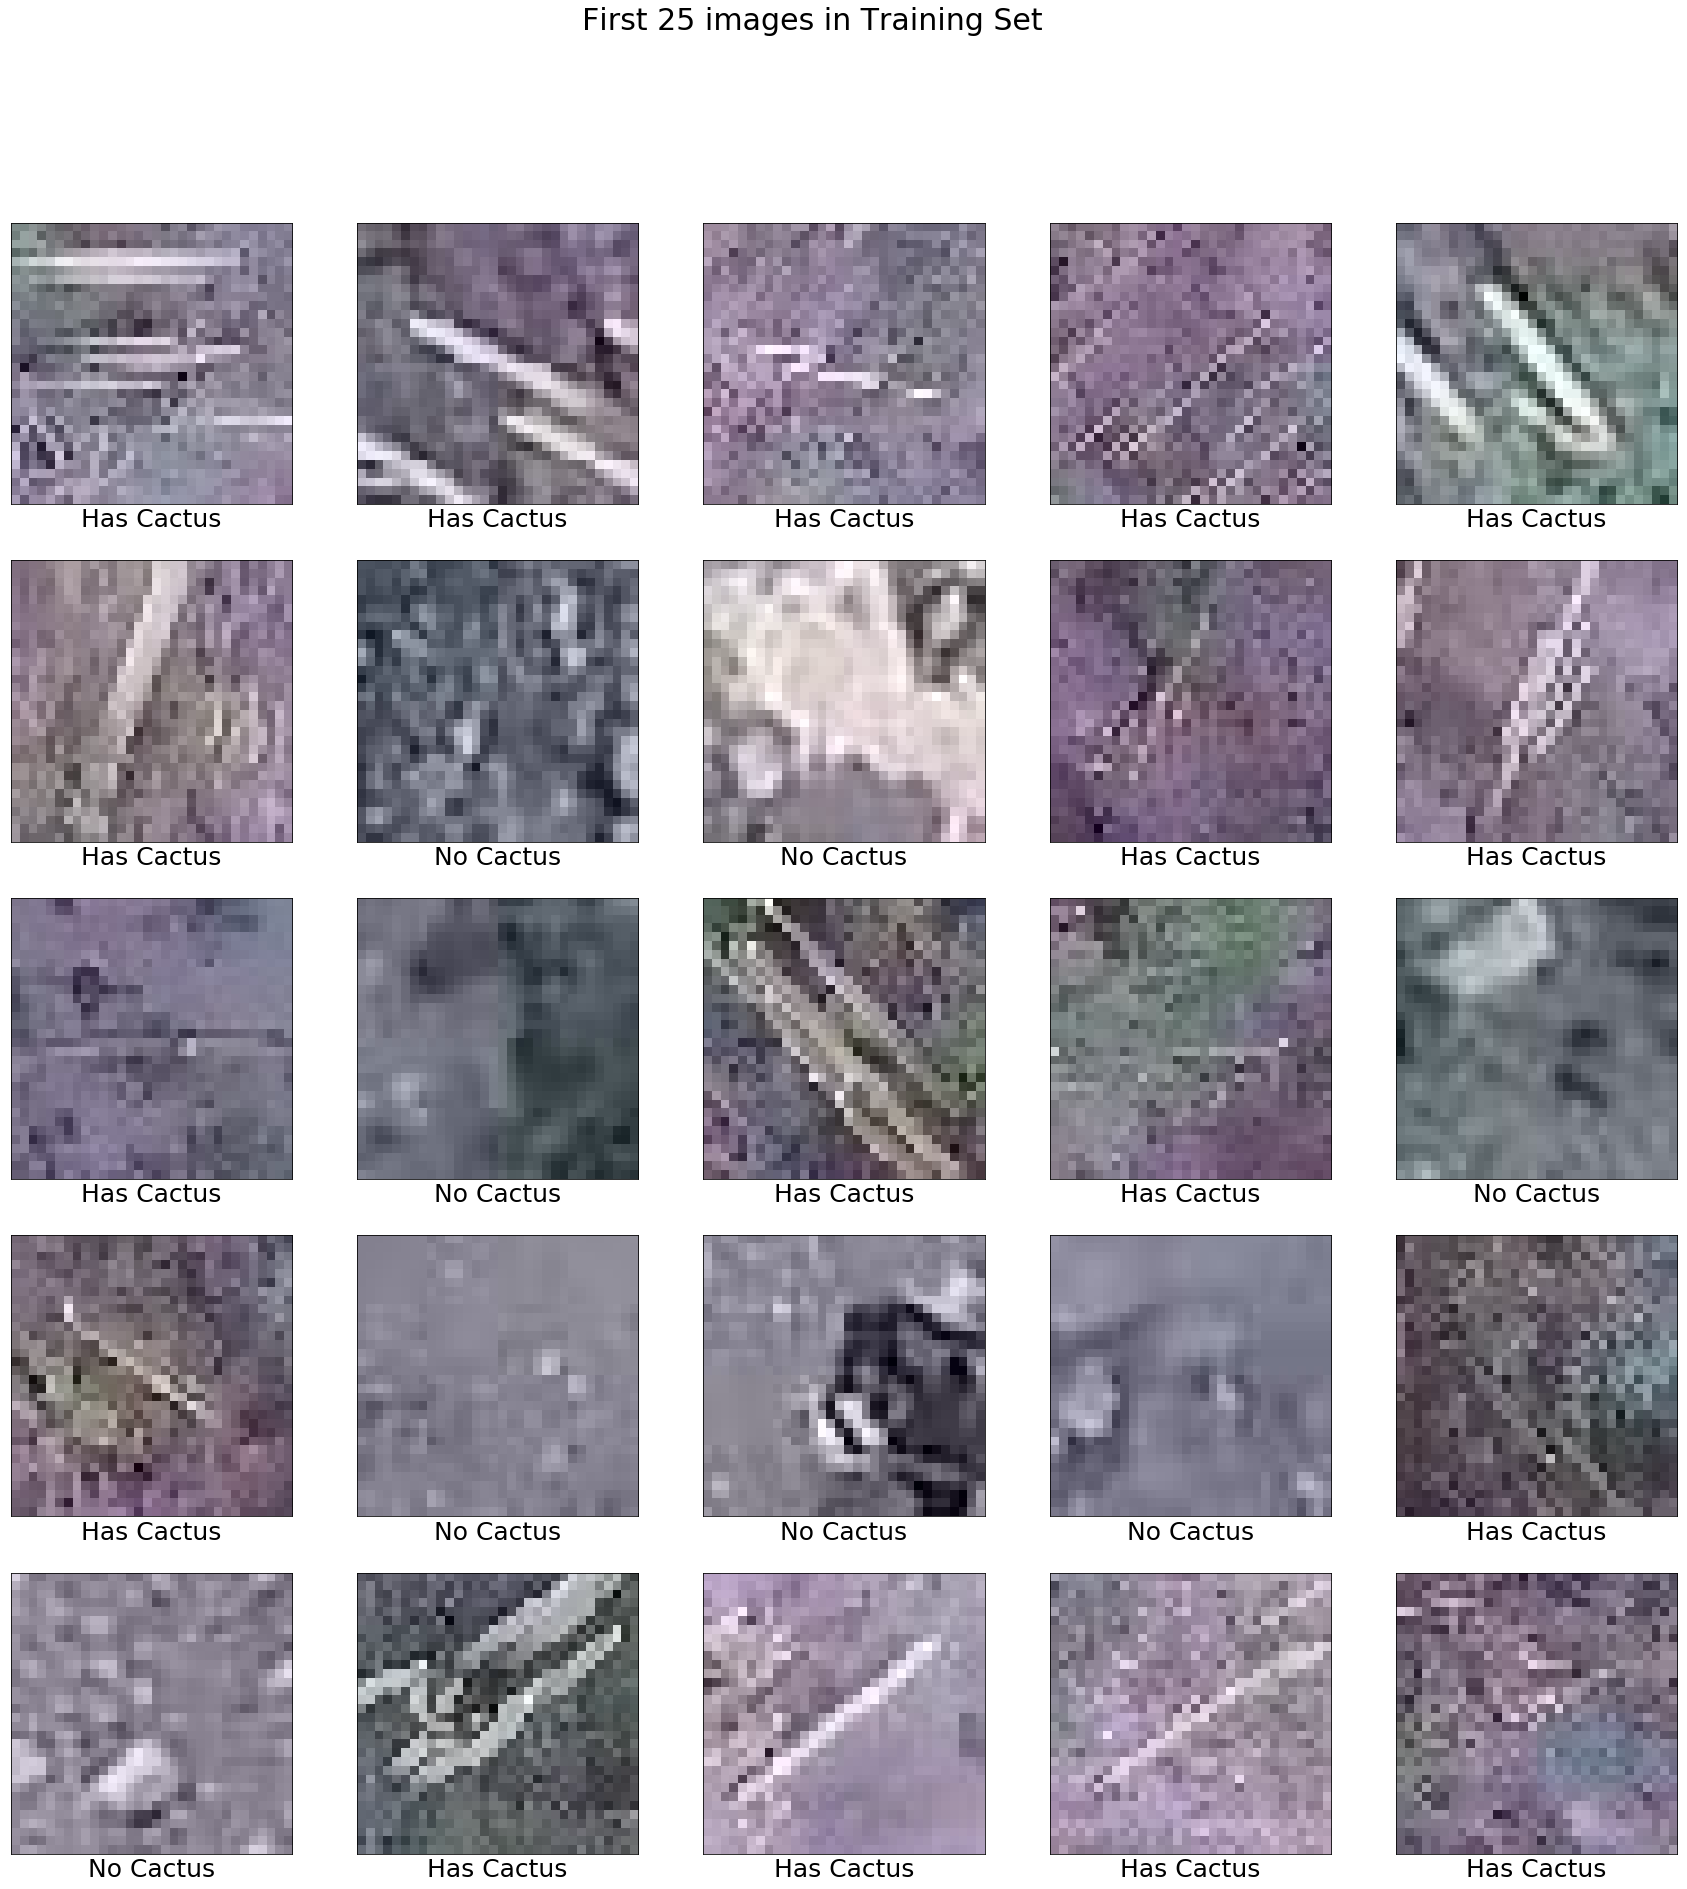

In [108]:
plt.figure(figsize = (30,30))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if Y[i]==1:
        l="Has Cactus"
    elif Y[i]==0:
        l="No Cactus"
    plt.xlabel(l,fontsize=25)
    plt.imshow(train[i])
plt.suptitle("First 25 images in Training Set ",fontsize=30)

In [109]:
test_viz=[]
X_test=[]

for i in tqdm(os.listdir(test_path)):
    id=i
    path=os.path.join(test_path,i)
    i=cv2.imread(path,cv2.IMREAD_COLOR)
    X_test.append(i)
    test_viz.append([np.array(i),id])

X_test=np.array(X_test)
X_test.shape
test_viz=np.array(test_viz)
id_test=test_viz[:,1]
test_viz=test_viz[:,0]
test_viz.shape

X_test=X_test/255
test_viz=test_viz/255

100%|██████████| 4000/4000 [00:00<00:00, 11766.16it/s]


Text(0.5, 0.98, 'First 25 images in Testing Set ')

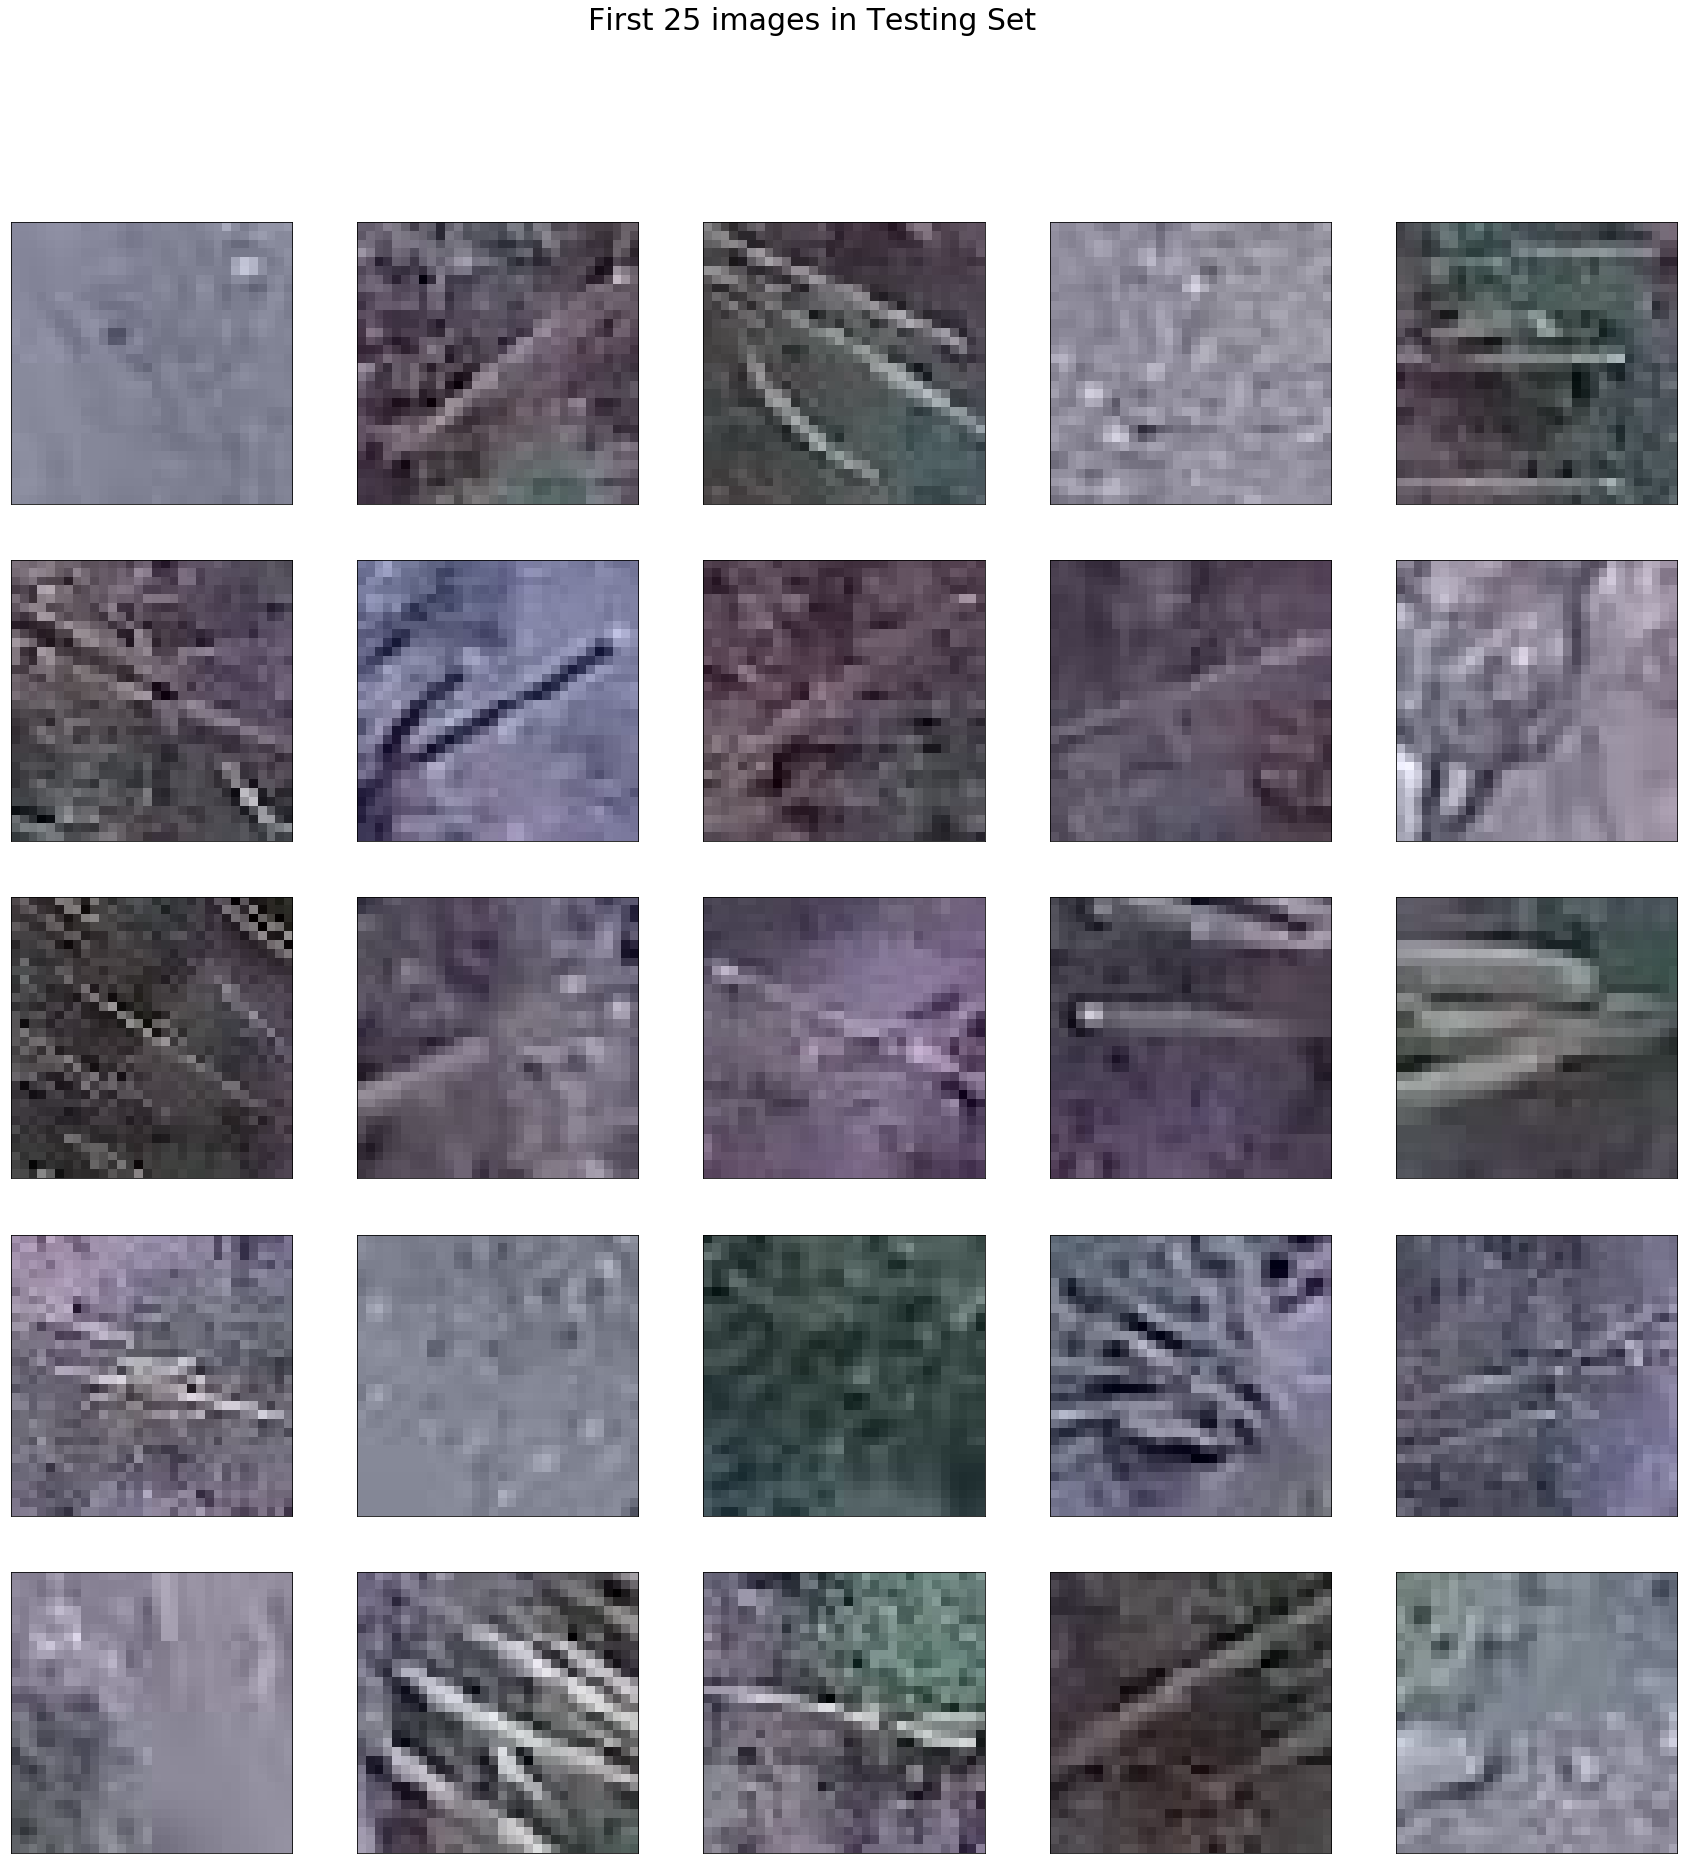

In [110]:
plt.figure(figsize = (30,30))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_viz[i])
plt.suptitle("First 25 images in Testing Set ",fontsize=30)

In [111]:
m=Sequential()
m.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(32,32,3)))
m.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
m.add(Conv2D(filters=32,kernel_size=4,padding="same",activation="relu"))
m.add(MaxPooling2D(pool_size=2,strides=1))
m.add(Dropout(0.2))
m.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
m.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
m.add(Conv2D(filters=64,kernel_size=4,padding="same",activation="relu"))
m.add(MaxPooling2D(pool_size=2,strides=1))
m.add(Dropout(0.2))
m.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
m.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
m.add(Conv2D(filters=128,kernel_size=4,padding="same",activation="relu"))
m.add(MaxPooling2D(pool_size=2,strides=1))
m.add(Dropout(0.2))
m.add(Flatten())
m.add(Dense(32,activation="relu"))
m.add(Dense(1,activation="sigmoid"))
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        4128      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        16416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 31, 31, 64)        8256      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 31, 31, 64)        16448     
__________

In [112]:
m.compile(loss="binary_crossentropy",optimizer='adam',metrics=["accuracy"])
s=time.time()

In [ ]:
h=m.fit(X,Y,batch_size=128,validation_split=0.2,epochs=100)
e=time.time()
t=e-s
print("Addestramento completato in %d minuti e %d secondi" %(t/60,t*60))

Train on 14000 samples, validate on 3500 samples
Epoch 1/100
14000/14000 [==============================] - 214s 15ms/step - loss: 0.3187 - acc: 0.8695 - val_loss: 0.2529 - val_acc: 0.9406
Epoch 2/100
14000/14000 [==============================] - 199s 14ms/step - loss: 0.2188 - acc: 0.9564 - val_loss: 0.2175 - val_acc: 0.9420
Epoch 3/100
14000/14000 [==============================] - 200s 14ms/step - loss: 0.1956 - acc: 0.9646 - val_loss: 0.2054 - val_acc: 0.9543
Epoch 4/100
 2688/14000 [====>.........................] - ETA: 2:28 - loss: 0.2008 - acc: 0.9572

In [ ]:
acc=h.history['acc']
val_acc=h.history['val_acc']
loss=h.history['loss']
val_loss=h.history['val_loss']

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(acc)
plt.plot(val_acc)
plt.title('Cactus_identifier_net1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(loss)
plt.plot(val_loss)
plt.title('Cactus_identifier_net1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()


In [ ]:
pred=m.predict(X_test)
ids=[]
label=[]
a=0
for i in tqdm(os.listdir(test_path)):
    id=i
    ids.append(id)
    label.append(pred[a])
    a=a+1

label=np.array(label,dtype='float64')
out=pd.DataFrame({'id': ids,'has_cactus':label[:,0]})

out.to_csv('cactus_identifier_net.csv',index=False,header=True)

In [ ]:
pred_train=m.predict(X)
p=[]
for i in pred_train:
    if i>0.5:
        p.append(1)
    elif i<0.5:
        p.append(0)
        
p=np.array(p,dtype='int')
Y=np.array(Y,dtype='int')

cm=confusion_matrix(Y,p)
cm_df = pd.DataFrame(cm,index = ['0 - No Cactus','1 - Has Cactus'],
                     columns = ['0 - No Catus','1 - Has Cactus'])
plt.figure(figsize=(10,10))
sns.heatmap(cm_df,annot=True,cmap="Blues_r",linewidth=0.5,square=True,fmt='g')

plt.ylabel("True Label ")
plt.xlabel("Predict Label")
plt.title("CONFUSION MATRIX FOR TRAINING SET")